<a href="https://colab.research.google.com/github/shashankbhatia15/Coronavirus-Tweet-Sentiment-Analysis/blob/main/Coronavirus_Tweet_Sentiment_Analysis_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## <b> Problem Description </b>

### This challenge asks you to build a classification model to predict the sentiment of COVID-19 tweets.The tweets have been pulled from Twitter and manual tagging has been done then.

### The names and usernames have been given codes to avoid any privacy concerns.

### You are given the following information:
1. Location
2. Tweet At
3. Original Tweet
4. Label

In [1]:
#import libraries
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np

from sklearn.metrics import *
from sklearn.model_selection import GridSearchCV
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier 
from xgboost import XGBClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [2]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
#read csv file
df=pd.read_csv('/content/drive/MyDrive/AlmaBetter/CAPSTONE PROJECTS/CORONAVIRUS TWEET SENTIMENT ANALYSIS - SHASHANK BHATIA/data/Coronavirus Tweets.csv',encoding= 'ISO-8859-1')

# **DATA OVERVIEW**

In [4]:
df.head()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,@MeNyrbie @Phil_Gahan @Chrisitv https://t.co/i...,Neutral
1,3800,48752,UK,16-03-2020,advice Talk to your neighbours family to excha...,Positive
2,3801,48753,Vagabonds,16-03-2020,Coronavirus Australia: Woolworths to give elde...,Positive
3,3802,48754,NaN,16-03-2020,My food stock is not the only one which is emp...,Positive
4,3803,48755,NaN,16-03-2020,"Me, ready to go at supermarket during the #COV...",Extremely Negative


In [5]:
df.tail()

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
41152,44951,89903,"Wellington City, New Zealand",14-04-2020,Airline pilots offering to stock supermarket s...,Neutral
41153,44952,89904,NaN,14-04-2020,Response to complaint not provided citing COVI...,Extremely Negative
41154,44953,89905,NaN,14-04-2020,You know itÂs getting tough when @KameronWild...,Positive
41155,44954,89906,NaN,14-04-2020,Is it wrong that the smell of hand sanitizer i...,Neutral
41156,44955,89907,i love you so much || he/him,14-04-2020,@TartiiCat Well new/used Rift S are going for ...,Negative


In [6]:
df.describe(include='all')

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
count,41157.000000,41157.000000,32567,41157,41157,41157
unique,NaN,NaN,12220,30,41157,5
top,NaN,NaN,London,20-03-2020,To protect our medical workers who are risking...,Positive
freq,NaN,NaN,540,3448,1,11422
mean,24377.000000,69329.000000,NaN,NaN,NaN,NaN
std,11881.146851,11881.146851,NaN,NaN,NaN,NaN
min,3799.000000,48751.000000,NaN,NaN,NaN,NaN
25%,14088.000000,59040.000000,NaN,NaN,NaN,NaN
50%,24377.000000,69329.000000,NaN,NaN,NaN,NaN
75%,34666.000000,79618.000000,NaN,NaN,NaN,NaN


In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41157 entries, 0 to 41156
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype 
---  ------         --------------  ----- 
 0   UserName       41157 non-null  int64 
 1   ScreenName     41157 non-null  int64 
 2   Location       32567 non-null  object
 3   TweetAt        41157 non-null  object
 4   OriginalTweet  41157 non-null  object
 5   Sentiment      41157 non-null  object
dtypes: int64(2), object(4)
memory usage: 1.9+ MB


In [8]:
df.columns

Index(['UserName', 'ScreenName', 'Location', 'TweetAt', 'OriginalTweet',
       'Sentiment'],
      dtype='object')

In [9]:
df.shape

(41157, 6)

In [10]:
df.Sentiment.unique()

array(['Neutral', 'Positive', 'Extremely Negative', 'Negative',
       'Extremely Positive'], dtype=object)

# **DATA INFORMATION**


---
We have 41157 rows and 6 columns in our dataset with null values present only in *location*, which will not affect our model as we will not be using this feature. Here our target variable will be *Sentiment*, which has 5 unique values- 'Neutral', 'Positive', 'Extremely Negative', 'Negative' and
       'Extremely Positive'. Out of the other 5 features, the only column we really need for our classification project is *OriginalTweet* .


In [11]:
#copying data to preserve orignal file
df1= df.copy()

# **EDA**

In [12]:
#check duplicate entries
len(df1[df1.duplicated()])

0

No duplicates found in the data 

**TWEET COUNT FOR EACH SENTIMENT**

In [13]:
#sentiment count
df1.Sentiment.value_counts()

Positive              11422
Negative               9917
Neutral                7713
Extremely Positive     6624
Extremely Negative     5481
Name: Sentiment, dtype: int64

/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


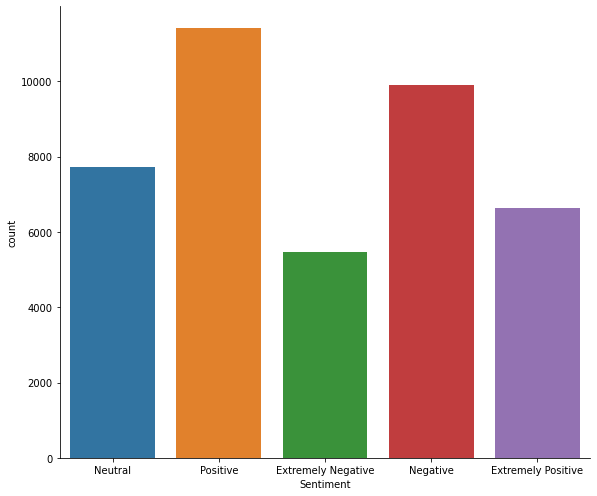

In [14]:
#plotting sentiment count
sns.catplot("Sentiment", data=df1, kind="count",height=7,aspect=1.2)

Most of the tweets are positive, which shows that people have kept their calm during the pandemic.

**TOP 10 LOCATION BASED ON TWEET COUNT**

In [15]:
#sentiment count
count=df1.Location.value_counts().head(10)
df1.Location.value_counts().head(10)

London             540
United States      528
London, England    520
New York, NY       395
Washington, DC     373
United Kingdom     337
Los Angeles, CA    281
India              268
UK                 232
Australia          225
Name: Location, dtype: int64

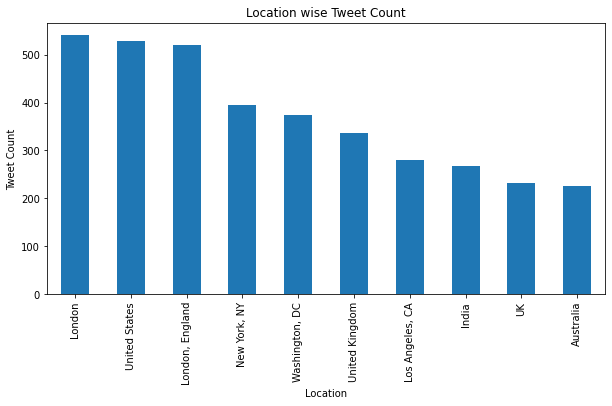

In [16]:
#plotting sentiment count
fig = plt.figure(figsize=(10, 5))
ax = fig.gca()
count.plot(ax = ax, kind='bar')
ax.set_title('Location wise Tweet Count')
ax.set_xlabel('Location') 
ax.set_ylabel('Tweet Count')
plt.show()

Maximum tweets are done from London and US.

# **TEXT PREPROCESSING**

**REMOVING LINKS/URLs**

In [17]:
import re
df1['OriginalTweet'] = df1['OriginalTweet'].apply(lambda x: re.sub('https?://[A-Za-z0-9./]+',' ', str(x)))

observing changes



In [18]:
#orignal data
df.OriginalTweet[5]

'As news of the regionÂ\x92s first confirmed COVID-19 case came out of Sullivan County last week, people flocked to area stores to purchase cleaning supplies, hand sanitizer, food, toilet paper and other goods, @Tim_Dodson reports https://t.co/cfXch7a2lU'

In [19]:
#copied data
df1.OriginalTweet[5]

'As news of the regionÂ\x92s first confirmed COVID-19 case came out of Sullivan County last week, people flocked to area stores to purchase cleaning supplies, hand sanitizer, food, toilet paper and other goods, @Tim_Dodson reports  '

**REMOVING USERNAMES/@USER**

In [20]:
df1['OriginalTweet'] = df1['OriginalTweet'].apply(lambda x: re.sub('@[\w]*',' ', str(x)))

In [21]:
#result
df1.OriginalTweet[5]

'As news of the regionÂ\x92s first confirmed COVID-19 case came out of Sullivan County last week, people flocked to area stores to purchase cleaning supplies, hand sanitizer, food, toilet paper and other goods,   reports  '

**REMOVING PUNCTUATIONS/NUMBERS/SPECIAL CHARACTERS**

In [22]:
df1['OriginalTweet'] = df1['OriginalTweet'].apply(lambda x: re.sub('[^a-zA-Z]',' ', str(x)))

In [23]:
#result
df1.OriginalTweet[5]

'As news of the region  s first confirmed COVID    case came out of Sullivan County last week  people flocked to area stores to purchase cleaning supplies  hand sanitizer  food  toilet paper and other goods    reports  '

**REMOVING STOP WORDS AND TOKENIZING**

In [24]:
#Importing Stop-words
import nltk
from nltk.corpus import stopwords

nltk.download('stopwords')
stop = stopwords.words('english')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [25]:
#function to remove stopwords and tokenize
def remove_stopwords(text):
    text = [word.lower() for word in text.split() if word.lower() not in stop]
    return (text)

In [26]:
df1['OriginalTweet']= df1['OriginalTweet'].apply(lambda x: remove_stopwords(x))

In [27]:
#result
df1.OriginalTweet[5]

['news',
 'region',
 'first',
 'confirmed',
 'covid',
 'case',
 'came',
 'sullivan',
 'county',
 'last',
 'week',
 'people',
 'flocked',
 'area',
 'stores',
 'purchase',
 'cleaning',
 'supplies',
 'hand',
 'sanitizer',
 'food',
 'toilet',
 'paper',
 'goods',
 'reports']

**REMOVING SHORT WORDS**

In [28]:
#Removing words with than 3 letters
df1['OriginalTweet'] = df1['OriginalTweet'].apply(lambda x: (w for w in x if len(w)>3))


**STEMMING**

In [29]:
from nltk.stem.porter import *
stemmer = PorterStemmer()

In [30]:
#function for stemming
def stemming(text):    
    text = [stemmer.stem(word) for word in text]
    return (" ".join(text))

In [31]:
df1['OriginalTweet'] = df1['OriginalTweet'].apply(lambda x: stemming(x))

In [32]:
#result
df1.OriginalTweet[5]

'news region first confirm covid case came sullivan counti last week peopl flock area store purchas clean suppli hand sanit food toilet paper good report'

**DATA ENCODING**






We will now encode our target variable - *Sentiment*.



In [33]:
#function to encode 

def encode(sentiment):
    if sentiment=='Neutral':  
        return 0                                                         # Changing neutral labels as 0
    elif (sentiment=='Positive') or  (sentiment=='Extremely Positive'):  
        return 1                                                         # Combining Positive and extremely positive labels as 1
    else:
        return -1                                                        # Combining Negative and extremely negative labels as -1
    


In [34]:
df1['Sentiment'] = df1['Sentiment'].apply(encode)

In [35]:
#taking a look at modified data
df1.head(5)

,UserName,ScreenName,Location,TweetAt,OriginalTweet,Sentiment
0,3799,48751,London,16-03-2020,,0
1,3800,48752,UK,16-03-2020,advic talk neighbour famili exchang phone numb...,1
2,3801,48753,Vagabonds,16-03-2020,coronaviru australia woolworth give elderli di...,1
3,3802,48754,NaN,16-03-2020,food stock empti pleas panic enough food every...,1
4,3803,48755,NaN,16-03-2020,readi supermarket covid outbreak paranoid food...,-1


/usr/local/lib/python3.7/dist-packages/seaborn/_decorators.py:43: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  FutureWarning


Text(0.5, 1.0, 'Counts of Sentiments after encoding')

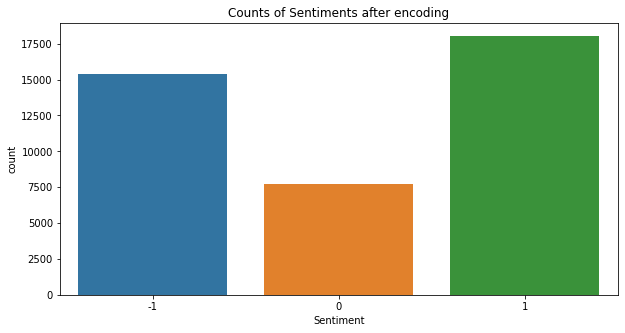

In [36]:
# Plotting the counts of encoded Sentiment
plt.figure(figsize=(10,5))
sns.countplot('Sentiment', data=df1)
plt.title("Counts of Sentiments after encoding")

WORD CLOUDS

In [37]:
from wordcloud import WordCloud, STOPWORDS
stopwords = set(STOPWORDS)

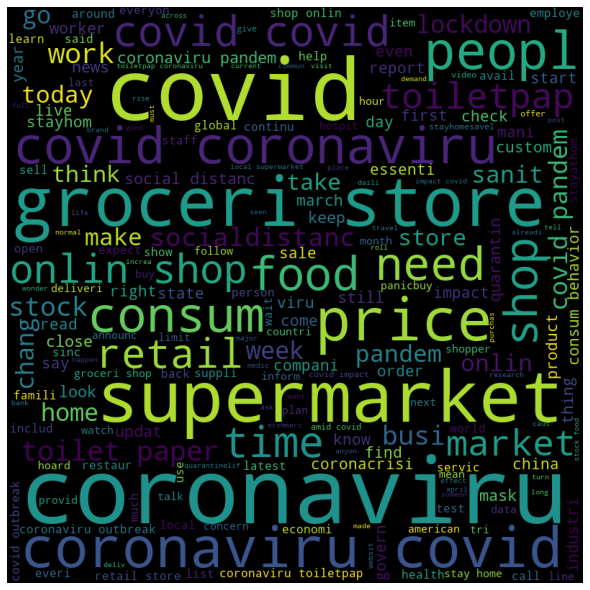

In [38]:
#word cloud for neutral sentiment
words=' '.join(text for text in df1['OriginalTweet'][df1['Sentiment'] == 0])
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = stopwords,
                min_font_size = 10).generate(words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

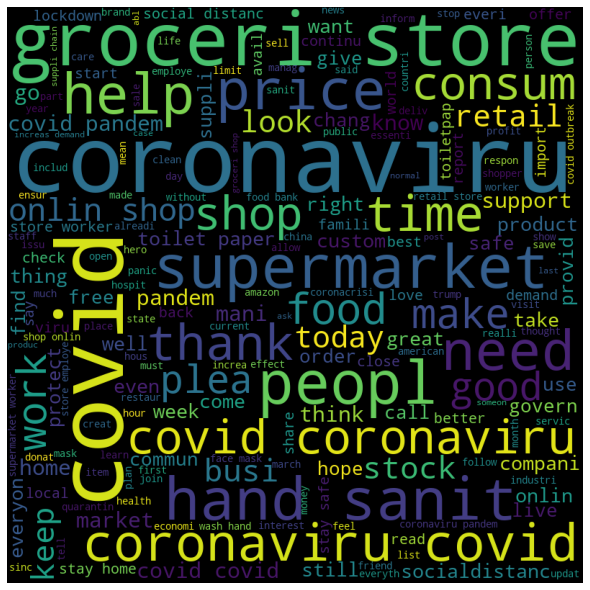

In [39]:
#word cloud for positive sentiment
words=' '.join(text for text in df1['OriginalTweet'][df1['Sentiment'] == 1])
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = stopwords,
                min_font_size = 10).generate(words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

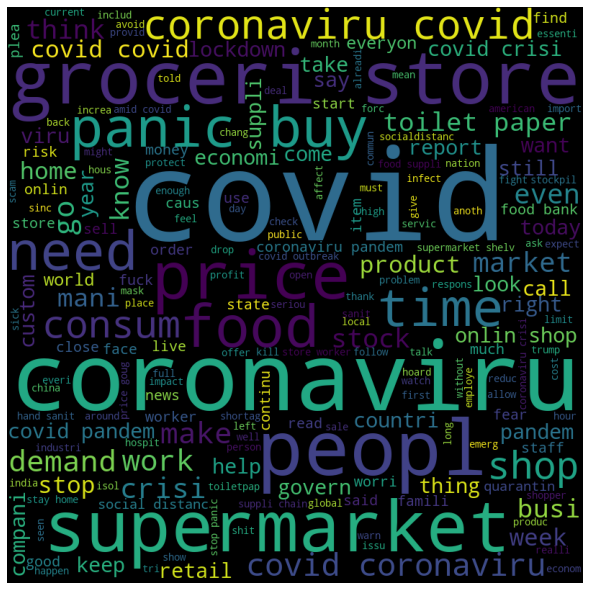

In [40]:
#word cloud for negative sentiment
words=' '.join(text for text in df1['OriginalTweet'][df1['Sentiment'] == -1])
 
wordcloud = WordCloud(width = 800, height = 800,
                background_color ='black',
                stopwords = stopwords,
                min_font_size = 10).generate(words)
 
# plot the WordCloud image                      
plt.figure(figsize = (8, 8))
plt.imshow(wordcloud)
plt.axis("off")
plt.tight_layout(pad = 0)
 
plt.show()

**VECTORIZATION AND DATA SPLIT**

In [41]:
#getting usable features
df2=df1[['OriginalTweet','Sentiment']]

In [42]:
#train test split
from sklearn.model_selection import train_test_split 
train,test = train_test_split(df2,test_size = 0.2,random_state=0,stratify = df2.Sentiment.values)

In [43]:
#vectorization
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords

stop = list(stopwords.words('english'))
vectorizer = CountVectorizer(decode_error = 'replace',stop_words = stop)

x_train = vectorizer.fit_transform(train.OriginalTweet.values)
x_test = vectorizer.transform(test.OriginalTweet.values)

y_train = train.Sentiment.values
y_test = test.Sentiment.values

In [44]:
#shape of split data
print("X_train.shape : ", x_train.shape)
print("X_test.shape : ", x_test.shape)
print("y_train.shape : ", y_train.shape)
print("y_test.shape : ", y_test.shape)

X_train.shape :  (32925, 26955)
X_test.shape :  (8232, 26955)
y_train.shape :  (32925,)
y_test.shape :  (8232,)


**DATAFRAME TO STORE EVALUATION METRICS**

I will store the evaluation metrics for each model into this data frame to compare at the end.

In [45]:
#empty data frame creation
i=0
error_df=pd.DataFrame()

# **LOGISTIC REGRESSION**

From this point we'll fit the data in various models and get our output.

In [46]:
#hyperparameter tuning
logr = LogisticRegression()
parameters = dict(penalty=['l1', 'l2'],C=[100, 10, 1.0, 0.1, 0.01])

In [47]:
#fitting data
logreg=GridSearchCV(logr,parameters,cv=3)
logreg.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/sklearn/model_selection/_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITER

GridSearchCV(cv=3, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': [100, 10, 1.0, 0.1, 0.01],
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [48]:
#prediction
y_pred = logreg.predict(x_test)

**EVALUATION**

In [49]:
#evaluation metrics

#F1 score
f1score = f1_score(y_test,y_pred,average='weighted')

#Accuracy
acc = accuracy_score(y_test,y_pred)

#precision
prec = precision_score(y_test,y_pred, average='weighted')

#recall
recall=recall_score(y_test,y_pred, average='weighted')

print('Accuracy :' ,acc)
print('Precision :', prec)
print('Recall :', recall)
print('F1 score :' ,f1score)

Accuracy : 0.7860787172011662
Precision : 0.7865484654018826
Recall : 0.7860787172011662
F1 score : 0.7862990022480381


In [50]:
#Inserting errors in dataframe

error_df.loc[i,"Model_Name"]='LOGISTIC REGRESSION'
error_df.loc[i,"Accuracy"]=round(acc,4)
error_df.loc[i,"Precision"]=round(prec,4)
error_df.loc[i,"Recall"]=round(recall,4)
error_df.loc[i,"F1 score"]=round(f1score,4)


i+=1


# **RANDOM FOREST CLASSIFIER**

In [51]:
#hyperparameter tuning
classifier = RandomForestClassifier()
parameters = {'n_estimators':[100, 200, 300], 'max_depth':[80, 90, 100, 110]}
rf = GridSearchCV(classifier, param_grid = parameters, cv=5,n_jobs=-1)

In [52]:
#fitting data
rf.fit(x_train, y_train)

/usr/local/lib/python3.7/dist-packages/joblib/externals/loky/process_executor.py:691: UserWarning: A worker stopped while some jobs were given to the executor. This can be caused by a too short worker timeout or by a memory leak.
  "timeout or by a memory leak.", UserWarning


GridSearchCV(cv=5, error_score=nan,
             estimator=RandomForestClassifier(bootstrap=True, ccp_alpha=0.0,
                                              class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features='auto',
                                              max_leaf_nodes=None,
                                              max_samples=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              n_estimators=100, n_jobs=None,
                                              oob_score=False,
                                              rando

In [53]:
#prediction
y_pred = rf.predict(x_test)

In [54]:
#evaluation metrics

#F1 score
f1score = f1_score(y_test,y_pred,average='weighted')

#Accuracy
acc = accuracy_score(y_test,y_pred)

#precision
prec = precision_score(y_test,y_pred, average='weighted')

#recall
recall=recall_score(y_test,y_pred, average='weighted')

print('Accuracy :' ,acc)
print('Precision :', prec)
print('Recall :', recall)
print('F1 score :' ,f1score)

Accuracy : 0.7293488824101069
Precision : 0.7339658226849695
Recall : 0.7293488824101069
F1 score : 0.7165732092007366


In [55]:
#Inserting errors in dataframe

error_df.loc[i,"Model_Name"]='RANDOM FOREST CLASSIFIER'
error_df.loc[i,"Accuracy"]=round(acc,4)
error_df.loc[i,"Precision"]=round(prec,4)
error_df.loc[i,"Recall"]=round(recall,4)
error_df.loc[i,"F1 score"]=round(f1score,4)


i+=1

# **XGBoost CLASSIFIER**

Note-  not doing hyperparameter tuning because i tried giving manual input but it's giving better results without any intervention.

In [56]:
#fitting data
xgb = XGBClassifier()
xgb.fit(x_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', colsample_bylevel=1,
              colsample_bynode=1, colsample_bytree=1, gamma=0,
              learning_rate=0.1, max_delta_step=0, max_depth=3,
              min_child_weight=1, missing=None, n_estimators=100, n_jobs=1,
              nthread=None, objective='multi:softprob', random_state=0,
              reg_alpha=0, reg_lambda=1, scale_pos_weight=1, seed=None,
              silent=None, subsample=1, verbosity=1)

In [57]:
#prediction
y_pred = xgb.predict(x_test)

In [58]:
#evaluation metrics

#F1 score
f1score = f1_score(y_test,y_pred,average='weighted')

#Accuracy
acc = accuracy_score(y_test,y_pred)

#precision
prec = precision_score(y_test,y_pred, average='weighted')

#recall
recall=recall_score(y_test,y_pred, average='weighted')

print('Accuracy :' ,acc)
print('Precision :', prec)
print('Recall :', recall)
print('F1 score :' ,f1score)

Accuracy : 0.6224489795918368
Precision : 0.6371912741454797
Recall : 0.6224489795918368
F1 score : 0.565453060790726


In [59]:
#Inserting errors in dataframe

error_df.loc[i,"Model_Name"]='XGBOOST CLASSIFIER'
error_df.loc[i,"Accuracy"]=round(acc,4)
error_df.loc[i,"Precision"]=round(prec,4)
error_df.loc[i,"Recall"]=round(recall,4)
error_df.loc[i,"F1 score"]=round(f1score,4)


i+=1

# **KNN CLASSIFIER**

In [60]:
#hyperparameter tuning
reg = KNeighborsClassifier()
param = {'n_neighbors': [1,2,3,4,5,6,7,8]}

In [61]:
#fitting data
knn = GridSearchCV(estimator=reg,param_grid=param)
knn.fit(x_train, y_train)

GridSearchCV(cv=None, error_score=nan,
             estimator=KNeighborsClassifier(algorithm='auto', leaf_size=30,
                                            metric='minkowski',
                                            metric_params=None, n_jobs=None,
                                            n_neighbors=5, p=2,
                                            weights='uniform'),
             iid='deprecated', n_jobs=None,
             param_grid={'n_neighbors': [1, 2, 3, 4, 5, 6, 7, 8]},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [62]:
#prediction
y_pred = knn.predict(x_test)

In [63]:
#evaluation metrics

#F1 score
f1score = f1_score(y_test,y_pred,average='weighted')

#Accuracy
acc = accuracy_score(y_test,y_pred)

#precision
prec = precision_score(y_test,y_pred, average='weighted')

#recall
recall=recall_score(y_test,y_pred, average='weighted')

print('Accuracy :' ,acc)
print('Precision :', prec)
print('Recall :', recall)
print('F1 score :' ,f1score)

Accuracy : 0.40792031098153547
Precision : 0.5964717650684201
Recall : 0.40792031098153547
F1 score : 0.4156266835874949


In [64]:
#Inserting errors in dataframe

error_df.loc[i,"Model_Name"]='KNN CLASSIFIER'
error_df.loc[i,"Accuracy"]=round(acc,4)
error_df.loc[i,"Precision"]=round(prec,4)
error_df.loc[i,"Recall"]=round(recall,4)
error_df.loc[i,"F1 score"]=round(f1score,4)


i+=1

# **SVM CLASSIFIER**

In [65]:
'''
#hyperparameter tuning
reg = SVC()
param = {     'C': [0.1, 1, 10, 1000],
              'gamma': [1, 0.1, 0.01, 0.001],
              'kernel': ['rbf']
        }
svm = GridSearchCV(reg,param)'''

NOTE- I ran gridsearch but it was still running after 2 hours, so i put the code as comments to show that i understand what exactly is needed to be done, but moving on in the project without tuning.

In [67]:
#fitting data
svm = SVC()
svm.fit(x_train, y_train)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [68]:
#prediction
y_pred = svm.predict(x_test)

In [69]:
#evaluation metrics

#F1 score
f1score = f1_score(y_test,y_pred,average='weighted')

#Accuracy
acc = accuracy_score(y_test,y_pred)

#precision
prec = precision_score(y_test,y_pred, average='weighted')

#recall
recall=recall_score(y_test,y_pred, average='weighted')

print('Accuracy :' ,acc)
print('Precision :', prec)
print('Recall :', recall)
print('F1 score :' ,f1score)

Accuracy : 0.7679786200194364
Precision : 0.7671625830044472
Recall : 0.7679786200194364
F1 score : 0.7674419684978078


In [70]:
#Inserting errors in dataframe

error_df.loc[i,"Model_Name"]='SVM CLASSIFIER'
error_df.loc[i,"Accuracy"]=round(acc,4)
error_df.loc[i,"Precision"]=round(prec,4)
error_df.loc[i,"Recall"]=round(recall,4)
error_df.loc[i,"F1 score"]=round(f1score,4)


i+=1

# **MODEL COMPARISION**

We will now compare performance of all the classification models-

In [71]:
#sorting by F1 score
error_df.sort_values(by=['F1 score'],ascending=False,inplace=True)
error_df=error_df.reset_index()
error_df.drop(labels='index',axis=1)

,Model_Name,Accuracy,Precision,Recall,F1 score
0,LOGISTIC REGRESSION,0.7861,0.7865,0.7861,0.7863
1,SVM CLASSIFIER,0.7680,0.7672,0.7680,0.7674
2,RANDOM FOREST CLASSIFIER,0.7293,0.7340,0.7293,0.7166
3,XGBOOST CLASSIFIER,0.6224,0.6372,0.6224,0.5655
4,KNN CLASSIFIER,0.4079,0.5965,0.4079,0.4156


# **CONCLUSION**

---
We can conclude that Logistic regression is the best model for our dataset, followed closely by SVM classifier and Random Forest classifier.
XGboost and KNN classifiers did not give a good result compared to others.
